In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from CurvatureTools import *
from CubicSpline import *

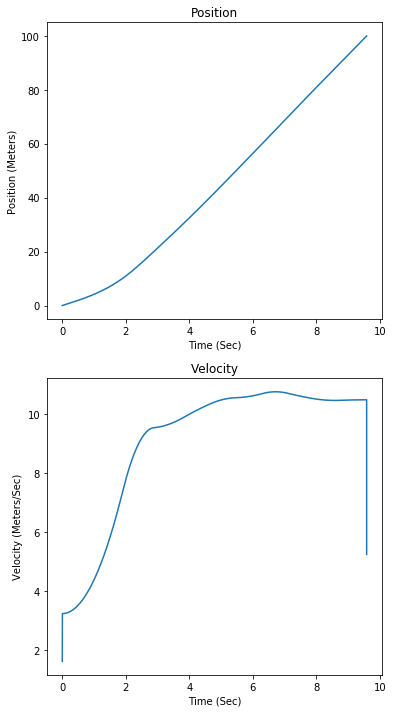

In [2]:
xs = np.array([0, 1.89, 2.88, 3.78, 4.64, 5.47, 6.29, 7.1, 7.92, 8.75, 9.58])
ys = np.arange(11)*10
t = np.linspace(0, 9.58, int(44100*9.58)) # How to sample
position = sample_cubic_spline(xs, ys, t)
velocity = getCurvVectors(position[:, None], 1, 1)[1]*t.size/xs.size
velocity = velocity.flatten()

plt.figure(figsize=(6, 12))
plt.subplot(211)
plt.plot(t, position)
plt.xlabel("Time (Sec)")
plt.ylabel("Position (Meters)")
plt.title("Position")

plt.subplot(212)
plt.plot(t, velocity)
plt.xlabel("Time (Sec)")
plt.ylabel("Velocity (Meters/Sec)")
plt.title("Velocity")

plt.show()